In [26]:
from model_lomba import *
import matplotlib.pyplot as plt

map_width = 50
map_height = 50
moore = False
model = switching_model(1,5,5,2,width=map_width,height=map_height,moore=moore)

#Dalam menit
num_of_step = 30*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

In [27]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position  Charge Alive
Step AgentID                       
0    0           None  2600.0  None
     1           None  2600.0  None
     2           None  2600.0  None
     3           None  2600.0  None
     4           None  2600.0  None

In [28]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
50    False
51     True
52    False
53    False
54    False
55     True
56     True
57    False
58    False
59    False
60     True
61     True
62     True
63     True
64    False
Name: Alive, dtype: object

In [29]:
#Ambil data motorist
driver_num = 8
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()

Step
0    (15, 4)
1    (15, 5)
2    (14, 5)
3    (13, 5)
4    (13, 4)
Name: Position, dtype: object

Text(0, 0.5, 'y')

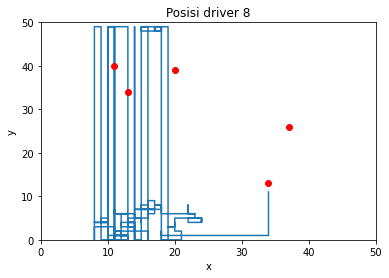

In [30]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.xlabel('x')
plt.ylabel('y')

<AxesSubplot:xlabel='Step'>

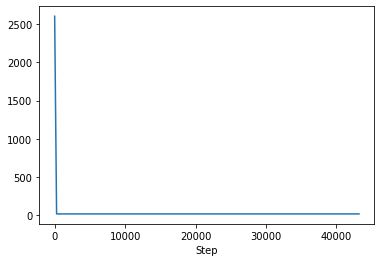

In [31]:
#Cek baterai
battery_num = 10
battery_energy = agent_data.xs(model.batteries[battery_num].unique_id, level = "AgentID")["Charge"]
battery_energy.plot()


In [32]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
43195,7
43196,7
43197,7
43198,7
43199,7


<AxesSubplot:>

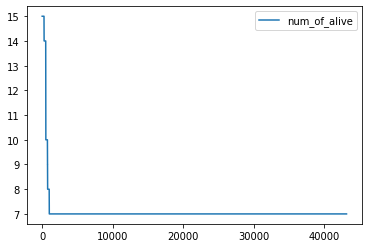

In [33]:
model_data.plot()

In [34]:
a = [1,2,3]
b = a
b.remove(3)
print(a)

[1, 2]
